In [1]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np

Plotear las imagenes de cv2 a plt

In [2]:
def convertImage(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def plotImage (image) :
    plt.axis('off')
    plt.imshow(convertImage(image))
    plt.show()

## Problema 1 

Crear una funcion para binirizar una imagen

In [3]:
def toBinary(image) :
  grayscale = image.copy()
  grayscale = cv2.cvtColor(grayscale, cv2.COLOR_BGR2GRAY)
  (thresh, im_bw) = cv2.threshold(grayscale, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  return im_bw

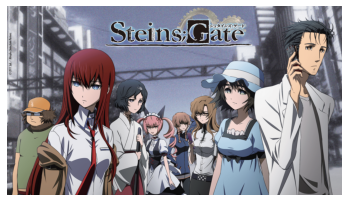

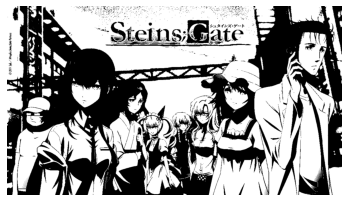

In [4]:
image = cv2.imread('test.png')
plotImage(image)

binaryImage = toBinary(image)
plotImage(binaryImage)

## Problema 2

Crear una funcion que sume, reste, or, and, xor dos imgenes 

(-0.5, 199.5, 199.5, -0.5)

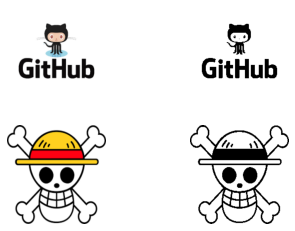

In [5]:
image_1 = cv2.imread('images/github.png')
image_1 = cv2.resize(image_1, (200, 200), interpolation = cv2.INTER_AREA)

imageBinary1 = toBinary(image_1)

image_2 = cv2.imread('images/onepiece.png')
image_2 = cv2.resize(image_2, (200, 200), interpolation = cv2.INTER_AREA)
imageBinary2 = toBinary(image_2)

f, axarr = plt.subplots(2,2)
axarr[0, 0].imshow(convertImage(image_1))
axarr[0, 1].imshow(convertImage(imageBinary1))
axarr[1, 0].imshow(convertImage(image_2))
axarr[1, 1].imshow(convertImage(imageBinary2))

axarr[0, 0].axis('off')
axarr[0, 1].axis('off')
axarr[1, 0].axis('off')
axarr[1, 1].axis('off')

In [6]:
def sumImages(image_1, image_2) :
    return image_1 + image_2

In [7]:
def subImages(image_1, image_2):
    return image_1 - image_2

In [8]:
def orImages(image_1, image_2):
    return cv2.bitwise_or(image_1, image_2)

In [9]:
def andImages(image_1, image_2):
    return cv2.bitwise_and(image_1, image_2)

In [10]:
def xorImages(image_1, image_2):
    return cv2.bitwise_xor(image_1, image_2)

Suma


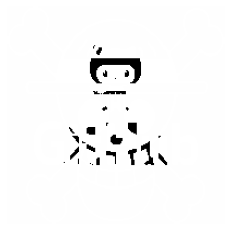

Resta


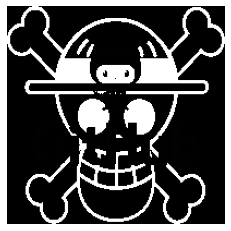

OR


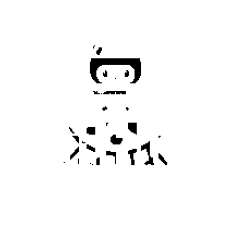

AND


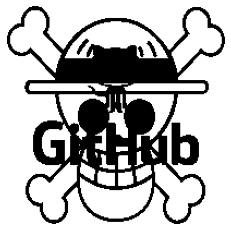

XOR


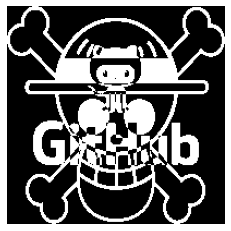

In [11]:
print("Suma")
newImage = sumImages(imageBinary1, imageBinary2)
plotImage(newImage)

print("Resta")
newImage = subImages(imageBinary1, imageBinary2)
plotImage(newImage)

print("OR")
newImage = orImages(imageBinary1, imageBinary2)
plotImage(newImage)

print("AND")
newImage = andImages(imageBinary1, imageBinary2)
plotImage(newImage)

print("XOR")
newImage = xorImages(imageBinary1, imageBinary2)
plotImage(newImage)


## Problema 3

Crear una funcion que grafique la imagen en su espacio muestral 

In [12]:
def histogramImage(image):

  imageToPlot = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  (height, width) = imageToPlot.shape


  _x = range(width)
  _y = range(height)

  z = np.ravel(imageToPlot)

  _xx, _yy = np.meshgrid(_x, _y)

  x, y = _xx.ravel(), _yy.ravel()

  fig = plt.figure(figsize=(8, 3))
  ax1 = fig.add_subplot(121, projection='3d')

  bottom = np.zeros_like(z)
  width = depth = 1

  ax1.bar3d(x, y, bottom, width, depth, z, shade=True)
  ax1.set_title('Histograma')

  plt.show()

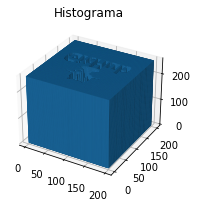

In [13]:
histogramImage(image_1)

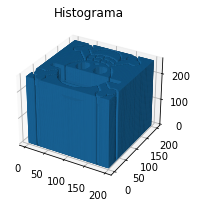

In [14]:
histogramImage(image_2)

## Problema 4 
Implente una funcion para cada una de las trasnformaciones, negativa, lineal, logaritmica y exponencial

### Negative

In [15]:
def negative(image):
    return 1 - image

(-0.5, 199.5, 199.5, -0.5)

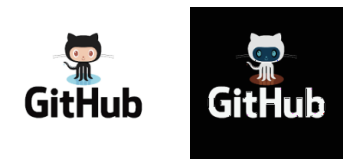

In [16]:
negativeImage = negative(image_1)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(convertImage(image_1))
axarr[1].imshow(convertImage(negativeImage))

axarr[0].axis('off')
axarr[1].axis('off')


## Lineal

In [17]:
def lineal(image):
    return 10 + image

(-0.5, 199.5, 199.5, -0.5)

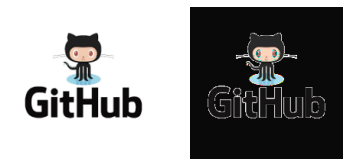

In [18]:
linealImage = lineal(image_1)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(convertImage(image_1))
axarr[1].imshow(convertImage(linealImage))

axarr[0].axis('off')
axarr[1].axis('off')

### Logaritmica

In [19]:

def log(image) :
    c = 255/(np.log(1 + np.max(image)))
    imageTransformed = c * np.log(1 + image)
    return np.array(imageTransformed, dtype = np.uint8)


<ipython-input-19-cb8d8f2d1965>:3: RuntimeWarning: divide by zero encountered in log
  imageTransformed = c * np.log(1 + image)


(-0.5, 199.5, 199.5, -0.5)

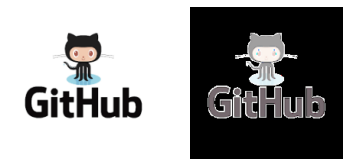

In [20]:
logImage = log(image_1)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(convertImage(image_1))
axarr[1].imshow(convertImage(logImage))

axarr[0].axis('off')
axarr[1].axis('off')

### Exponencial

In [21]:
def exponential(image):


    img2 = np.zeros(image.shape, dtype = np.uint8)
    
    gamma = 0.08
    c = 255/255**gamma
    
    for x in range(0, image.shape[0]):
        for y in range(0,image.shape[1]):
            img2[x, y] = c*image[x, y]**gamma   

    return img2     

(-0.5, 199.5, 199.5, -0.5)

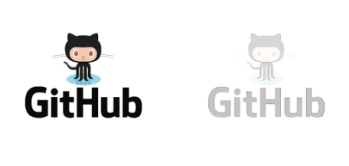

In [22]:
expImage = exponential(image_1)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(convertImage(image_1))
axarr[1].imshow(convertImage(expImage))

axarr[0].axis('off')
axarr[1].axis('off')

## Problema 5 

Crear una funcioin que dada una imagen, cuilauiqer kernel con cualquier dimension y cualquier tipo aplique un filtro de convolucion a dicha imagen

In [23]:
def filterImage(image, filter_matrix):
    filter = np.array (filter_matrix)
    return cv2.filter2D (image, -1, filter) 

### Filtro Gradiente 3x3

(-0.5, 199.5, 199.5, -0.5)

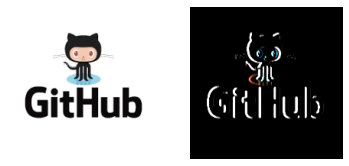

In [24]:
gradient = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]

imageFilter =filterImage(image_1, gradient)


f, axarr = plt.subplots(1,2)
axarr[0].imshow(convertImage(image_1))
axarr[1].imshow(convertImage(imageFilter))

axarr[0].axis('off')
axarr[1].axis('off')


### Filtro Laplaciano 5x5

(-0.5, 199.5, 199.5, -0.5)

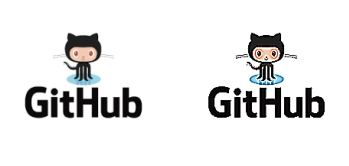

In [25]:
laplacian = [[0, 0, -1, 0, 0], 
[0,  -1,  -2, -1,  0], 
[-1, -2,  17, -2, -1],
[0,  -1,  -2, -1,  0],
[0,   0,  -1,  0,  0]]

imageFilter =filterImage(image_1, laplacian)


f, axarr = plt.subplots(1,2)
axarr[0].imshow(convertImage(image_1))
axarr[1].imshow(convertImage(imageFilter))

axarr[0].axis('off')
axarr[1].axis('off')

### Filtro Sobel Vertical 7x7

(-0.5, 199.5, 199.5, -0.5)

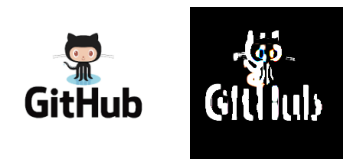

In [26]:
sobel = [
 [3, 2, 1, 0, -1, -2, -3],
[4, 3,  2, 0,  -2, -3, -4],
[5, 4, 3, 0, -3, -4, -5],
[6, 5, 4, 0, -4, -5, -6],
[5, 4, 3, 0, -3, -4, -5],
[4, 3, 2, 0, -2, -3, -4],
[3, 2, 1, 0, -1, -2, -3]]


imageFilter =filterImage(image_1, sobel)


f, axarr = plt.subplots(1,2)
axarr[0].imshow(convertImage(image_1))
axarr[1].imshow(convertImage(imageFilter))

axarr[0].axis('off')
axarr[1].axis('off')

### Filtro Gaussiano 5x5

(-0.5, 199.5, 199.5, -0.5)

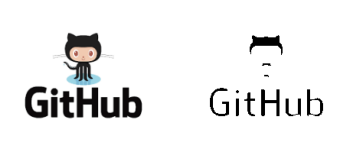

In [27]:
gaussian = [[1, 4, 7, 4, 1],
[4, 20, 33, 20, 4],
[7, 33, 55, 33, 7],
[4, 20, 33, 20, 4],
[1,  4,  7,  4, 1]]


imageFilter =filterImage(toBinary(image_1), gaussian)


f, axarr = plt.subplots(1,2)
axarr[0].imshow(convertImage(image_1))
axarr[1].imshow(convertImage(imageFilter))

axarr[0].axis('off')
axarr[1].axis('off')